In [1]:
require(tidyverse)
require(googlesheets4)
require(cowplot)
require(janitor)
require(ggrepel)
require(broom)

source('wilke_themes.R')

theme_set(theme_dviz_open(font_family = 'Helvetica', font_size = 16) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle=90, hjust=1, vjust=0.5))
          )

Loading required package: tidyverse

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: googlesheets4

Loading required package: cowplot


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: janitor


Attaching package: ‘janitor’


The following object

In [2]:
MY_URL <- 'https://docs.google.com/spreadsheets/d/1-9FLURtw3nYH_LcgB-NI-2qQXeX5ZN1Wlidaq8ZBmt4/edit?gid=0#gid=0'
df <- MY_URL %>%
    read_sheet(col_types = 'cccdc')  %>%
    mutate(date = date %>% dmy()) %>%
    mutate_at(vars(matches('location|direction')), as_factor)

! Using an auto-discovered, cached token.

  To suppress this message, modify your code or options to clearly consent to the use of a cached token.

  See gargle's "Non-interactive auth" vignette for more details:

  <https://gargle.r-lib.org/articles/non-interactive-auth.html>

ℹ The googlesheets4 package is using a cached token for curt.r.fischer@gmail.com.

Auto-refreshing stale OAuth token.

✔ Reading from ira_50m_times.

✔ Range Sheet1.



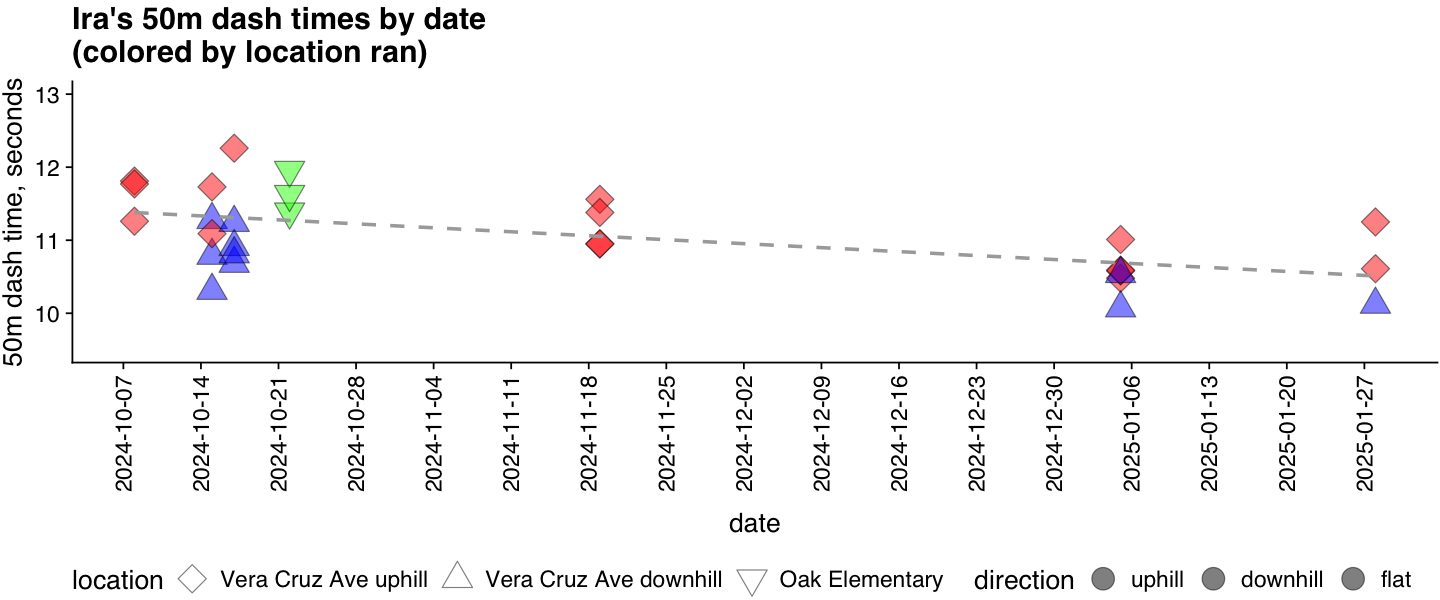

In [11]:
options(repr.plot.width = 12, repr.plot.height = 5)
df %>%
    filter(!is.na(time_s)) %>%
    ggplot(aes(x = date, 
               y = time_s,
               )) +
        geom_point(aes(shape = location, 
                       fill = direction,
                       color = location),
                   size=6, 
                   alpha=0.5, 
                   color='black')  +
        geom_smooth(se=F, method = 'lm', formula = y ~ x, linetype='dashed', color='dark grey', aes(group=1)) +
        scale_y_continuous(limits = c(9.5, 13), name = '50m dash time, seconds') +
        scale_x_date(date_breaks = '1 week') +
        scale_shape_manual(values = c(23, 24, 25, 26), guide = guide_legend()) +
        scale_fill_manual(guide = guide_legend(), values = c('red', 'blue', 'green')) +
        scale_color_manual(guide = guide_legend()) +
        ggtitle("Ira's 50m dash times by date\n(colored by location ran)")

In [4]:
df %>%
    select(-notes) %>%
    filter(direction %in% c('downhill', 'uphill')) %>%
    na.omit() %>%
    group_by(1) %>%
    group_nest() %>%
    mutate(
        model = map(data, ~{lm(time_s ~ date, data = .x)}),
        tidied = map(model, tidy),
        glanced = map(model, glance)
  ) %>%
    select(-model, -data) %>%
    unnest(tidied, glanced)

Warning message:
“`unnest()` has a new interface. See `?unnest` for details.
ℹ Try `df %>% unnest(c(tidied, glanced))`, with `mutate()` if needed.”


1,term,estimate,std.error,statistic,p.value,r.squared,adj.r.squared,sigma,statistic1,p.value1,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,(Intercept),151.415193587,44.066554583,3.436057,0.002157413,0.2972849,0.2680051,0.4652103,10.15324,0.003969021,1,-15.95494,37.90987,41.68416,5.194095,24,26
1,date,-0.007004242,0.002198157,-3.186415,0.003969021,0.2972849,0.2680051,0.4652103,10.15324,0.003969021,1,-15.95494,37.90987,41.68416,5.194095,24,26
